# Simple Linear Regression

How to calculate and visualize a best-fit line using [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression).

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read in some data (Broadway data set)

In [2]:
df = pd.read_csv("broadway.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
Attendance         31296 non-null int64
Capacity           31296 non-null int64
Day                31296 non-null int64
Full               31296 non-null object
Gross              31296 non-null int64
Gross Potential    31296 non-null int64
Month              31296 non-null int64
Name               31296 non-null object
Performances       31296 non-null int64
Theatre            31296 non-null object
Type               31296 non-null object
Year               31296 non-null int64
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


## Linear Regression for Attendance and Gross (revenue)

First, we can get the data we want to use into individual column (Series) variables.

In [3]:
attendance = df["Attendance"]
attendance.head()

0     5500
1     1737
2    12160
3    13921
4    10973
Name: Attendance, dtype: int64

In [4]:
gross = df["Gross"]
gross.head()

0    134456
1    100647
2    634424
3    713353
4    573981
Name: Gross, dtype: int64

## Compute slope and intercept

*[Formulas thanks to Wikipedia.]*

$$
slope = \frac{\mbox{Cov}(X, Y)}{\mbox{Var}(X)}
$$

Cov() is "covariance," while Var() is "variance."  Both can be computed using methods available on any Pandas column (aka Series object).

In [5]:
slope = attendance.cov(gross) / attendance.var()
slope

94.02750409318983

$$
intercept = \mbox{mean}(Y) - slope \cdot \mbox{mean}(X)
$$

mean() (average) is also a method we can call on a Pandas column.

In [6]:
intercept = gross.mean() - slope * attendance.mean()
intercept

-157140.67106568743

## Checking the work via **visualization**

We can visualize the prediction line, overlaying it on the original data, in order to both check our work and to gain some insights into the data.

We can plot an arbitrary line using Matplotlib as long as we can give it two points on the line; the `plt.plot()` method will draw a line segment between the two points.

In [7]:
# Make two points on the best-fit line to chart it

# The first point can be at x=0, where we know the y-value is the line's intercept.
x1 = 0
y1 = intercept

# The second point can be based on maximum x value of Attendance,
# and its y-value is whatever the linear regression predicts (using y=mx+b).
x2 = attendance.max()
y2 = slope*x2 + intercept

print("(x1={}, y1={})  (x2={}, y2={})".format(x1, y1, x2, y2))

(x1=0, y1=-157140.67106568743)  (x2=21631, y2=1876768.2699741018)


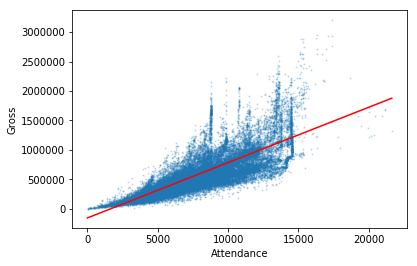

In [8]:
# Plot the original data in a scatter plot
plt.scatter(attendance, gross, alpha=0.2, s=1)
# Plot a red line through (x1,y1) and (x2,y2), overlaid on top of the scatterplot
plt.plot([x1, x2], [y1, y2], 'r')
plt.xlabel("Attendance")
plt.ylabel("Gross")
plt.show()